In [11]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = df[['Sex', 'Pclass', 'Fare']]
label = df['Survived']

In [49]:
train_d, test_d, train_l, test_l = train_test_split(data, label, test_size=0.3)

clf = SVC(C=1, gamma=0.1)
clf.fit(train_d, train_l)
pred = clf.predict(test_d)
score = accuracy_score(pred, test_l)

In [50]:
print(score)

0.7611940298507462


In [77]:
p_label = pd.Series(pred, index=test_l.index)

In [79]:
p_label

172    1
649    1
141    1
882    1
702    1
      ..
779    1
602    1
813    0
486    1
708    0
Length: 268, dtype: int64

In [80]:
p_label.count()

268

In [81]:
test_l.count()

268

In [82]:
(test_l^p_label) == 0

172     True
649     True
141     True
882    False
702    False
       ...  
779     True
602    False
813     True
486     True
708    False
Length: 268, dtype: bool

XORの否定をとることで正誤表を作成

"errata"は正誤表の意

In [83]:
errata = pd.Series((test_l^p_label) == 0)

In [84]:
errata.count()

268

In [85]:
errata

172     True
649     True
141     True
882    False
702    False
       ...  
779     True
602    False
813     True
486     True
708    False
Length: 268, dtype: bool

In [89]:
test_d[errata == True].describe()

,Sex,Pclass,Fare
count,204.000000,204.000000,204.000000
mean,0.377451,2.362745,36.148979
std,0.485942,0.815964,64.577780
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,7.891650
50%,0.000000,3.000000,13.000000
75%,1.000000,3.000000,31.303125
max,1.000000,3.000000,512.329200


In [90]:
test_d[errata == False].describe()

,Sex,Pclass,Fare
count,64.000000,64.000000,64.000000
mean,0.343750,2.078125,41.254233
std,0.478714,0.931029,50.029323
min,0.000000,1.000000,6.975000
25%,0.000000,1.000000,10.503150
50%,0.000000,2.000000,26.193750
75%,1.000000,3.000000,50.837475
max,1.000000,3.000000,263.000000


In [30]:
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


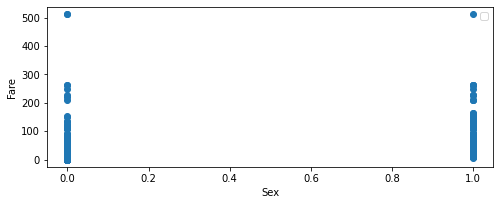

In [35]:
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.scatter(x=df['Sex'], y=df['Fare'])
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.legend()
plt.show()